# V8 MIITS analysis for RRR = 131

Imports

In [1]:
import numpy as _np
from matplotlib import pyplot as _plt
import quench as _quench
import detection as _detection
import materials as _materials

Simulation for

- Model V8
- Iop = 228A
- Rdump = 2 ohm
- t_det = 100 ms
- t_valid = 30 ms
- t_act = 12 ms

In [6]:
# SWLS - Model V8.0
Tc = 9.2
Tcs = 6.1
s_cu = 2.76144e-7
s_nbti = 2.99794e-7
s_insulator = 0
RRR = 131
t_valid = 0.04
t_act = 0.012
ps_delay = 0.07 # seg
max_ps_voltage = 10 # V
#V_fw_diode = 0.8 # freewheeling diode fwd voltage
V_fw_diode = 0.0 # freewheeling diode fwd voltage
magnet_vol = 564 * (s_cu + s_nbti)
vdet = 0.1 # V
Bmax = 5.3 # T
L_I = {
    0.0 : 0.37428008998875145,
    1.0 : 0.37090854893138364,
    5.0 : 0.35742238470191234,
    10.0 : 0.3405646794150732,
    20.790378006872857: 0.3041844769403825,
    22.8: 0.2970,
    45.6: 0.2177,
    68.4: 0.1761,
    91.2: 0.1539,
    114.0: 0.1428,
    136.8: 0.1355,
    159.6: 0.1303,
    182.4: 0.1267,
    205.2: 0.1241,
    228.0: 0.1219,
    250.0: 0.1203,
    300.0: 0.1178
}

# Wilson simulation parameters
time_step_1 = 0.00001
time_step_2 = 0.001
t_switch_time_step = 0.005
alpha = 0.03
use_magnetoresist=True
geometry = 'line'
curr_tol = 1

# Simulation scenarios
scenario_Iop = [228, 300]
scenario_Rdump = [2, 8/5]
scenario_Top = [4.2, 5]
scenario_B = _np.linspace(0, Bmax, 6, endpoint=True)

hot_spot_results = []

dict_scwire = {}
dict_scwire['Iop'] = scenario_Iop[0]
dict_scwire['B'] = Bmax
dict_scwire['Top'] = scenario_Top[0]
dict_scwire['Tc'] = Tc
dict_scwire['Tcs'] = Tcs
dict_scwire['RRR'] = RRR
dict_scwire['ratio_cu_sc'] = s_cu/s_nbti
dict_scwire['d_cond'] = 8.5633e-4
dict_scwire['L'] = L_I

counter = 0
# Hot-spot by MIITS
scwire = _materials.SCWire(dict_scwire)
for Iop in scenario_Iop:
    for B in scenario_B:
        for Rdump in scenario_Rdump:
            for Top in scenario_Top:
                print('counter={}'.format(counter))
                counter += 1
                Jo = Iop/_np.add(s_cu, s_nbti)
                Jo_mm2 = Jo*1e-6
                Tcs = scwire.calc_current_sharing_temp(Jo_mm2, B)
                Tjoule = _np.divide(_np.add(Tc, Tcs), 2)
                if Top >= Tcs:
                    raise ValueError('Tcs cannot be smaller than Top')
                # calculate average heat capacity
                C_avg = _quench.composite_vol_specific_heat_sc(
                    s_cu, s_nbti, Tjoule, Top, B
                )
                rho = _quench.composite_resistivity(
                    Tjoule, s_cu, s_nbti, RRR, B,
                    is_sc=False, use_magnetoresist=True
                )
                k_avg=_quench.composite_thermal_conductivity(
                    copper_area=s_cu, nbti_area=s_nbti, T2=Tjoule,
                    T1=Top, RRR=RRR
                    )
                vq = _detection.calc_prop_velocity(
                    Jo=Jo, C=C_avg, rho=rho, k=k_avg, Tjoule=Tjoule,
                    Top=Top, method='adiabatic'
                    )
                t_det = _detection.calc_detection_time(
                    vq, rho, vdet=vdet, Io=Iop, Acu=s_cu
                    )
                t_switch = t_det + t_valid + t_act
                t_max = _quench.calc_hot_spot(
                    copper_area=s_cu,
                    nbti_area=s_nbti,
                    I_op=Iop,
                    tau=L_I[Iop]/Rdump,
                    t_switch=t_switch,
                    RRR=RRR,
                    B=B,
                    )
                hot_spot_results.append((Iop, Rdump, Top, B, C_avg, rho, k_avg, vq, t_switch, t_max))

# print hot-spot results
print(hot_spot_results)


counter=0
calc hot spot : t = 4.0
calc hot spot : t = 4.1
calc hot spot : t = 4.199999999999999
calc hot spot : t = 4.299999999999999
calc hot spot : t = 4.399999999999999
calc hot spot : t = 4.499999999999998
calc hot spot : t = 4.599999999999998
calc hot spot : t = 4.6999999999999975
calc hot spot : t = 4.799999999999997
calc hot spot : t = 4.899999999999997
calc hot spot : t = 4.9999999999999964
calc hot spot : t = 5.099999999999996
calc hot spot : t = 5.199999999999996
calc hot spot : t = 5.299999999999995
calc hot spot : t = 5.399999999999995
calc hot spot : t = 5.499999999999995
calc hot spot : t = 5.599999999999994
calc hot spot : t = 5.699999999999994
calc hot spot : t = 5.799999999999994
calc hot spot : t = 5.899999999999993
calc hot spot : t = 5.999999999999993
calc hot spot : t = 6.0999999999999925
calc hot spot : t = 6.199999999999992
calc hot spot : t = 6.299999999999992
calc hot spot : t = 6.3999999999999915
calc hot spot : t = 6.499999999999991
calc hot spot : t = 6.5999

Wilson quench propagation simulations for main scenarios

In [7]:
# scenario 1
scenario_1 = {}
scenario_1['Iop'] = 300
scenario_1['Rdump'] = 8/5
scenario_1['Top'] = 5
scenario_1['B'] = 5.3
# scenario 2
scenario_2 = {}
scenario_2['Iop'] = 300
scenario_2['Rdump'] = 8/5
scenario_2['Top'] = 4.2
scenario_2['B'] = 5.3
# scenario 3
scenario_3 = {}
scenario_3['Iop'] = 300
scenario_3['Rdump'] = 8/5
scenario_3['Top'] = 5
scenario_3['B'] = 0.0
# scenario 4
scenario_4 = {}
scenario_4['Iop'] = 228
scenario_4['Rdump'] = 2
scenario_4['Top'] = 5
scenario_4['B'] = 5.3
scenarios = [scenario_1, scenario_2, scenario_3, scenario_4]

for scenario in scenarios:
    Jo = scenario['Iop']/_np.add(s_cu, s_nbti)
    Jo_mm2 = Jo*1e-6
    Tcs = scwire.calc_current_sharing_temp(
        Jo_mm2, scenario['B']
        )
    # Wilson simulation
    [
        R, I, Vq, Ve, Vc, Vl, Vnz, Eq, Eps, Tmax, Tavg,
            final_zone_transv_radius, final_zone_long_radius,
            time_axis, iter_cnt
        ] = _quench.simple_quench_propagation(
        I_op=scenario['Iop'], T_cs=Tcs, T_op=scenario['Top'],
        copper_area=s_cu, nbti_area=s_nbti, insulator_area=s_insulator,
        inductanceI=L_I, magnet_vol=magnet_vol, t_valid=t_valid,
        t_act=t_act, det_tresh=vdet, R_dump=scenario['Rdump'],
        time_step_1=time_step_1, time_step_2=time_step_2,
        switch_time_step=t_switch_time_step, RRR=RRR, B=scenario['B'],
        alpha=alpha, tolerance=curr_tol, geometry=geometry,
        V_ps_max = max_ps_voltage, t_ps=ps_delay,
        V_fw_diode=V_fw_diode, use_magnetoresist=use_magnetoresist,
        print_results=False
        )
    scenario['results'] = {
        'R' : R, 'I' : I, 'Vq' : Vq, 'Ve' : Ve, 'Vc' : Vc, 'Vl' : Vl,
        'Vnz' : Vnz, 'Eq' : Eq, 'Eps' : Eps, 'Tmax' : Tmax, 'Tavg' : Tavg,
        'final_zone_transv_radius' : final_zone_transv_radius,
        'final_zone_long_radius' : final_zone_long_radius,
        'time_axis' : time_axis, 'iter_cnt' : iter_cnt,
    }

num iter = 1
max temp = 7.989338542938784
Iop = 300.0


num iter = 2
max temp = 8.163086299114239
Iop = 300.0


num iter = 3
max temp = 8.328563168356798
Iop = 300.0


num iter = 4
max temp = 8.48665403435152
Iop = 300.0


num iter = 5
max temp = 8.638140771486217
Iop = 300.0


num iter = 6
max temp = 8.783677698353479
Iop = 300.0


num iter = 7
max temp = 8.923818967123351
Iop = 300.0


num iter = 8
max temp = 9.059038810016588
Iop = 300.0


num iter = 9
max temp = 9.189746799926308
Iop = 300.0


num iter = 10
max temp = 9.316299551065242
Iop = 300.0


num iter = 11
max temp = 9.439009826576637
Iop = 300.0


num iter = 12
max temp = 9.558153723754856
Iop = 300.0


num iter = 13
max temp = 9.673976411417744
Iop = 300.0


num iter = 14
max temp = 9.786696761273607
Iop = 300.0


num iter = 15
max temp = 9.896511123531667
Iop = 300.0


num iter = 16
max temp = 10.003596432642075
Iop = 300.0


num iter = 17
max temp = 10.108102624758713
Iop = 300.0


num iter = 18
max temp = 10.20990512593

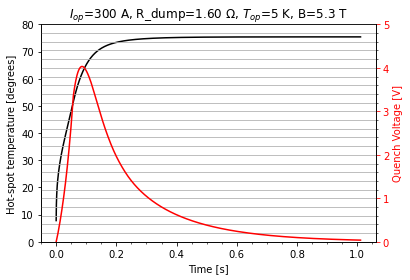

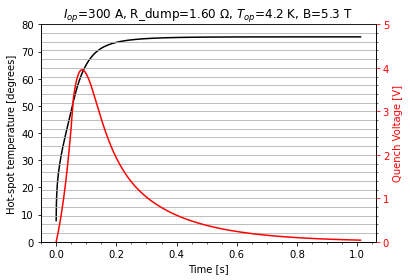

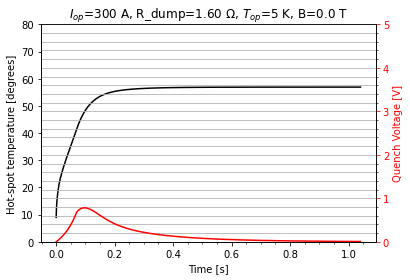

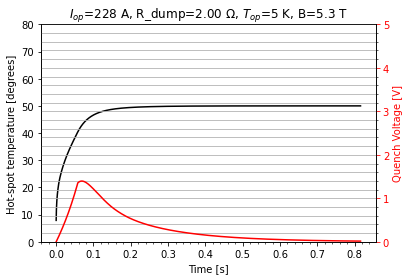

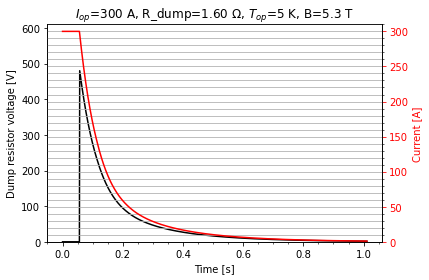

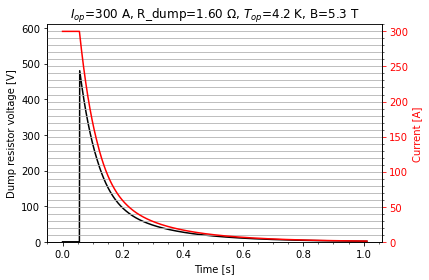

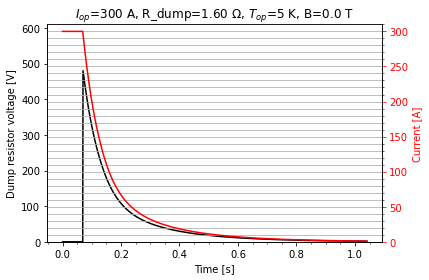

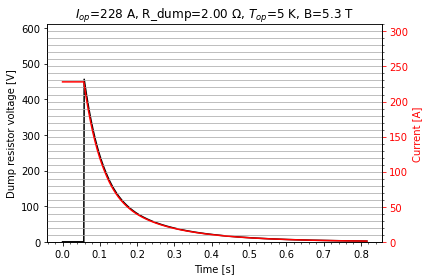

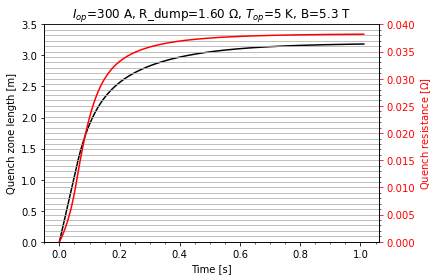

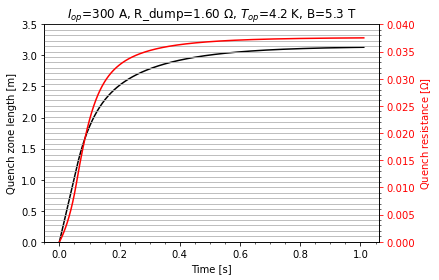

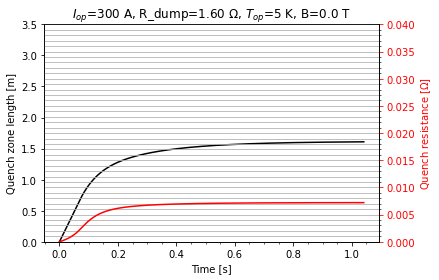

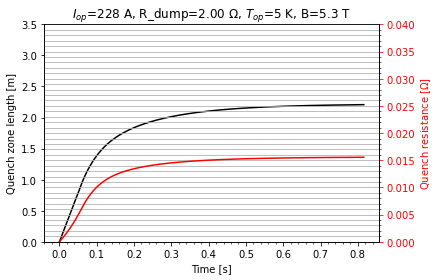

In [12]:
# plot hot-spot temp and quench voltage
for scenario in scenarios:
    data = scenario['results']
    fig, ax1 = _plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(data['time_axis'], data['Tmax'], 'k-')
    ax2.plot(data['time_axis'], data['Vq'], 'r-')
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Hot-spot temperature [degrees]', color='k')
    ax2.set_ylabel('Quench Voltage [V]', color='r')
    ax1.set_ylim([0, 80])
    ax2.set_ylim([0, 4.5])
    ax2.tick_params(axis='y', colors='r')
    _plt.minorticks_on()
    _plt.grid(which='both', axis='both')
    _plt.title(
        '$I_{{op}}$={} A, R_dump={:.2f} $\Omega$, $T_{{op}}$={} K, B={} T'.format(
            scenario['Iop'],
            scenario['Rdump'],
            scenario['Top'],
            scenario['B']
            )
        )
    _plt.show()

# plot dump voltage and current decay
for scenario in scenarios:
    data = scenario['results']
    fig, ax1 = _plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(data['time_axis'], data['Ve'], 'k-')
    ax2.plot(data['time_axis'], data['I'], 'r-')
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Dump resistor voltage [V]', color='k')
    ax2.set_ylabel('Current [A]', color='r')
    ax1.set_ylim([0, 610])
    ax2.set_ylim([0, 310])
    ax2.tick_params(axis='y', colors='r')
    _plt.minorticks_on()
    _plt.grid(which='both', axis='both')
    _plt.title(
        '$I_{{op}}$={} A, R_dump={:.2f} $\Omega$, $T_{{op}}$={} K, B={} T'.format(
            scenario['Iop'],
            scenario['Rdump'],
            scenario['Top'],
            scenario['B']
            )
        )
    _plt.show()

# plot quench zone length and quench resistance
for scenario in scenarios:
    data = scenario['results']
    fig, ax1 = _plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(data['time_axis'], data['final_zone_long_radius'], 'k-')
    ax2.plot(data['time_axis'], data['R'], 'r-')
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Quench zone length [m]', color='k')
    ax2.set_ylabel('Quench resistance [$\Omega$]', color='r')
    ax2.tick_params(axis='y', colors='r')
    ax1.set_ylim([0, 3.5])
    ax2.set_ylim([0, 0.04])
    _plt.minorticks_on()
    _plt.grid(which='both', axis='both')
    _plt.title(
        '$I_{{op}}$={} A, R_dump={:.2f} $\Omega$, $T_{{op}}$={} K, B={} T'.format(
            scenario['Iop'],
            scenario['Rdump'],
            scenario['Top'],
            scenario['B']
            )
        )
    _plt.show()